<a href="https://colab.research.google.com/github/pooriaazami/deep_learning_class_notebooks/blob/main/VGG16_keras_applicarions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.applications.VGG16()

553467096/553467096 [==============================] - 8s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

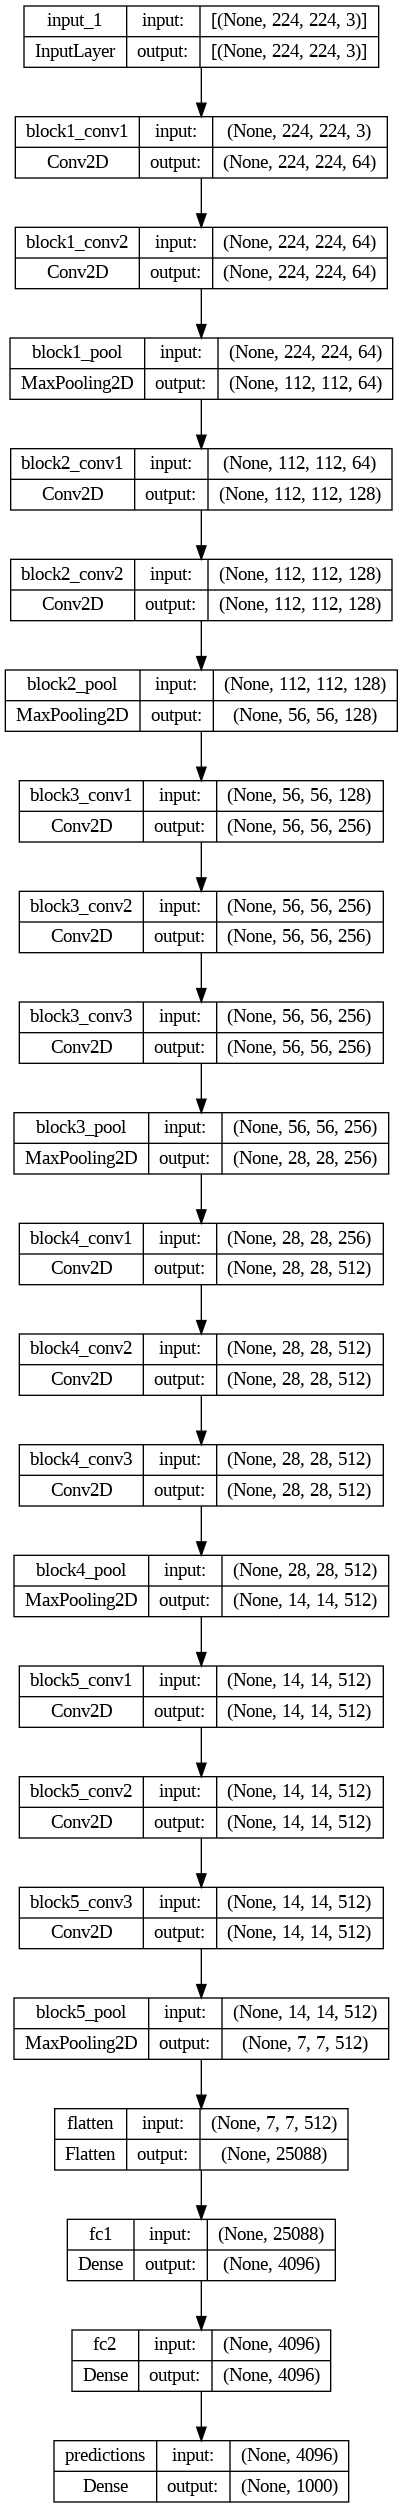

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [5]:
train_data, validation_data, test_data = tfds.load('horses_or_humans', as_supervised=True, split=['train', 'test[:50%]', 'test[50%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteWL1IDO/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteWL1IDO/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [6]:
WIDTH = 224
HEIGHT = 224

HUMAN = 0
HORSE = 1

BATCH_SIZE = 32

def preprocess(img, label):
  return tf.image.resize(img, [WIDTH, HEIGHT]) / 255., label

In [7]:
train_data = train_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)
validation_data = validation_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)
test_data = test_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)

In [8]:
pretrained_vgg = keras.applications.VGG16(include_top=False, input_shape=(WIDTH, HEIGHT, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
pretrained_vgg.trainable=False

In [10]:
classifier = keras.Sequential([
    pretrained_vgg,

    layers.Flatten(name='flatten_layer'),

    layers.Dense(1, activation='sigmoid', name='output_layer')
],name='classifier')

In [11]:
classifier.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_layer (Flatten)     (None, 25088)             0         
                                                                 
 output_layer (Dense)        (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = classifier.fit(train_data, validation_data=validation_data, epochs=10)

Epoch 1/10
33/33 [==============================] - 19s 197ms/step - loss: 0.2486 - accuracy: 0.8900 - val_loss: 0.1977 - val_accuracy: 0.9062
Epoch 2/10
33/33 [==============================] - 4s 123ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9688
Epoch 3/10
33/33 [==============================] - 4s 128ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9688
Epoch 4/10
33/33 [==============================] - 4s 129ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9453
Epoch 5/10
33/33 [==============================] - 4s 124ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9375
Epoch 6/10
33/33 [==============================] - 4s 124ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9453
Epoch 7/10
33/33 [==============================] - 4s 130ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9453
Epoch

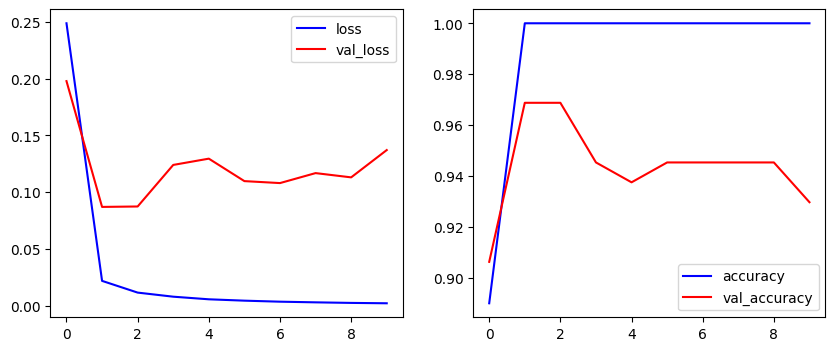

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history.history['loss'], label='loss', color='blue')
axs[0].plot(history.history['val_loss'], label='val_loss', color='red')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy', color='blue')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy', color='red')
axs[1].legend()

plt.show()